# Gaussian Mixture

## Setup
Let us import the required modules.

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering_model import MixtureGaussianEvaluation
from src.models.clustering import plot_cluster_frequencies, plot_cluster_composition, plot_reconstructed_images, visualize_model_means

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [3]:
mg_evaluation = MixtureGaussianEvaluation(
    data=data,
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[x for x in range(5, 16)]
)

In [4]:
mg_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/GaussianMixture_n_components_result.json
Loading /Users/a/GitHub/clustering/src/results/GaussianMixture_n_components_result_bestmodels.json
Loading /Users/a/GitHub/clustering/src/results/GaussianMixture_n_components_bestmodel.pkl


In [ ]:
%%time
# mg_evaluation.evaluate()

## Results

In [10]:
mg_evaluation.results()

{2: {5: {'score': 0.7710540038574184,
   'n_clusters': 5,
   'time': 1.3665994010000304},
  6: {'score': 0.7898257426550876,
   'n_clusters': 6,
   'time': 2.6588156110000227},
  7: {'score': 0.8284234792281081, 'n_clusters': 7, 'time': 1.885179225999991},
  8: {'score': 0.8376215341912178,
   'n_clusters': 8,
   'time': 2.2572500750000017},
  9: {'score': 0.8488011082424255, 'n_clusters': 9, 'time': 2.164524583000002},
  10: {'score': 0.8545385282622228,
   'n_clusters': 10,
   'time': 2.988646281000001},
  11: {'score': 0.8579282193626075,
   'n_clusters': 11,
   'time': 1.7412127100000134},
  12: {'score': 0.8628263039196677,
   'n_clusters': 12,
   'time': 1.5176897159999498},
  13: {'score': 0.8663999469349851,
   'n_clusters': 13,
   'time': 2.4921969279999985},
  14: {'score': 0.8679773555253947,
   'n_clusters': 14,
   'time': 2.5895350759999474},
  15: {'score': 0.8715986345963487,
   'n_clusters': 15,
   'time': 2.4979489400000148}},
 5: {5: {'score': 0.8095914197952915, 'n_c

In [8]:
mg_evaluation.results_bestmodels()

{'2': {'n_components': 15,
  'score': 0.8715986345963487,
  'n_clusters': 15,
  'time': 2.4979489400000148},
 '5': {'n_components': 13,
  'score': 0.8931761962589164,
  'n_clusters': 13,
  'time': 8.251082634999989},
 '10': {'n_components': 12,
  'score': 0.9079958976661598,
  'n_clusters': 12,
  'time': 45.48534859100005},
 '15': {'n_components': 11,
  'score': 0.9126967334401437,
  'n_clusters': 11,
  'time': 71.85931490500002},
 '25': {'n_components': 14,
  'score': 0.9228860122661823,
  'n_clusters': 14,
  'time': 180.9962048740001},
 '50': {'n_components': 12,
  'score': 0.9104217954343677,
  'n_clusters': 12,
  'time': 201.9081879360001},
 '100': {'n_components': 13,
  'score': 0.9024067229291888,
  'n_clusters': 13,
  'time': 214.96596043599993},
 '150': {'n_components': 14,
  'score': 0.902746543120427,
  'n_clusters': 14,
  'time': 144.52290483100023},
 '200': {'n_components': 14,
  'score': 0.8881699509148613,
  'n_clusters': 14,
  'time': 77.07598245600002}}

In [9]:
mg_evaluation.best_model()

{'model': GaussianMixture(max_iter=200, n_components=14, random_state=28),
 'n_components': 14,
 'score': 0.9228860122661823,
 'n_clusters': 14,
 'time': 180.9962048740001}

## Plots

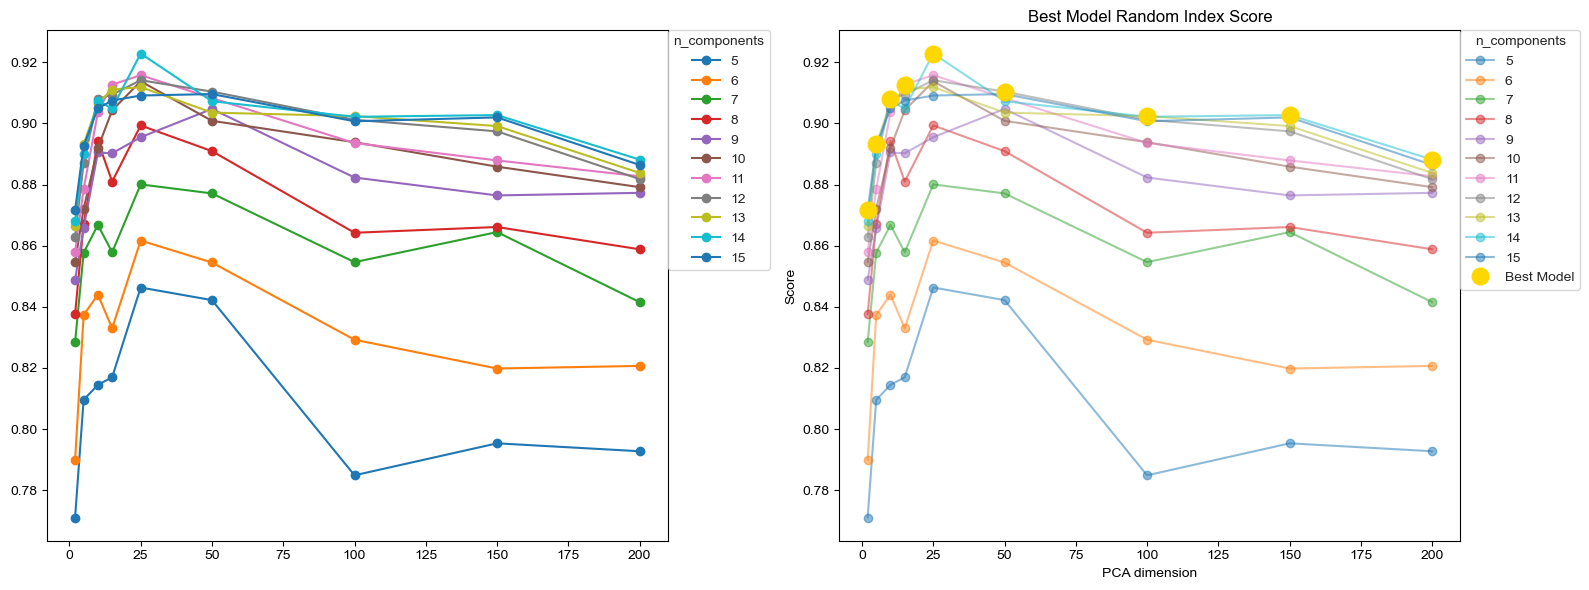

In [5]:
mg_evaluation.plot_score_with_highlight(save=True)

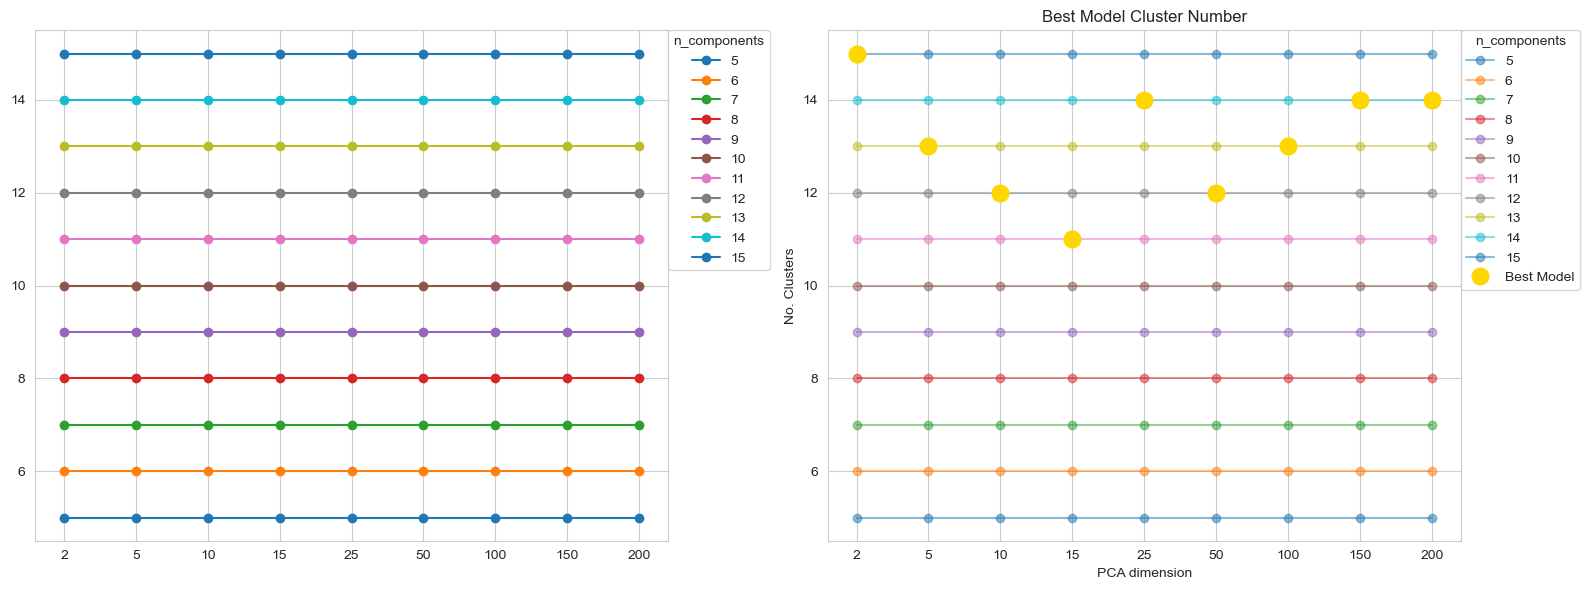

In [6]:
mg_evaluation.plot_n_clusters_with_highlight(save=True)

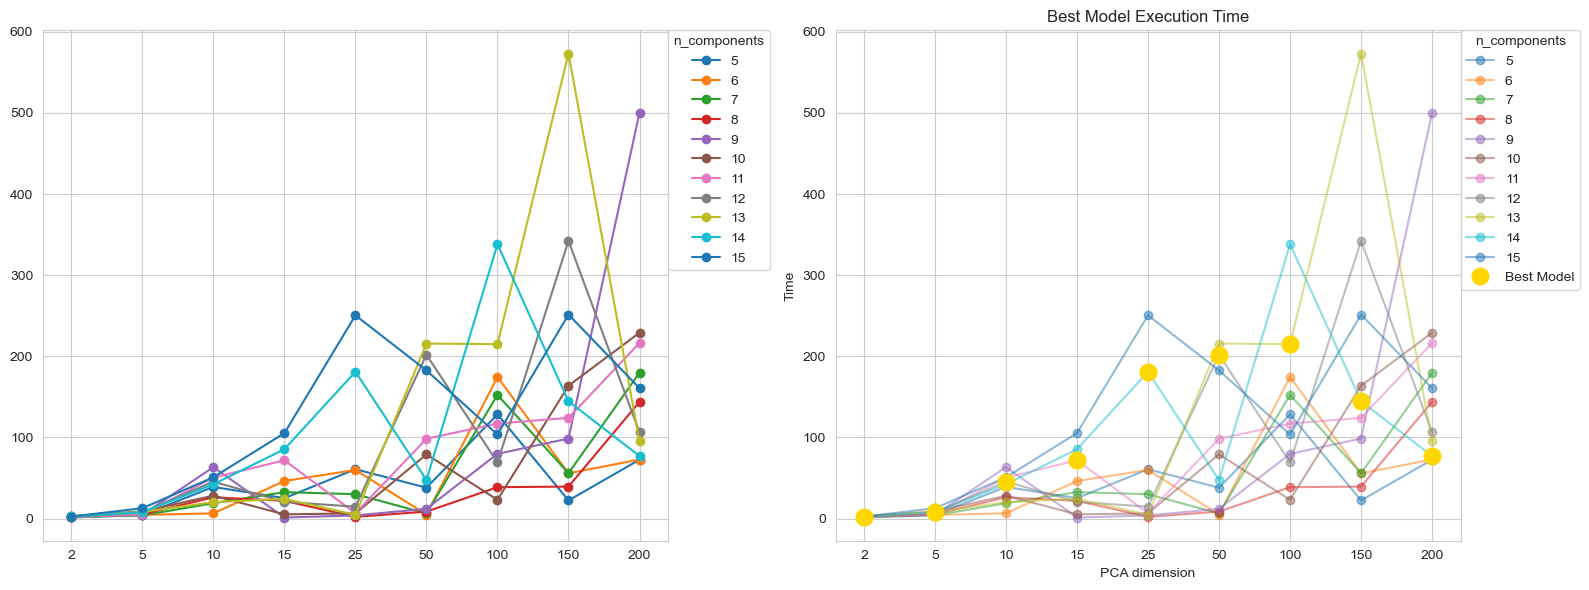

In [7]:
mg_evaluation.plot_time_with_highlight(save=True)

## some title

In [5]:
best = mg_evaluation.best_model()

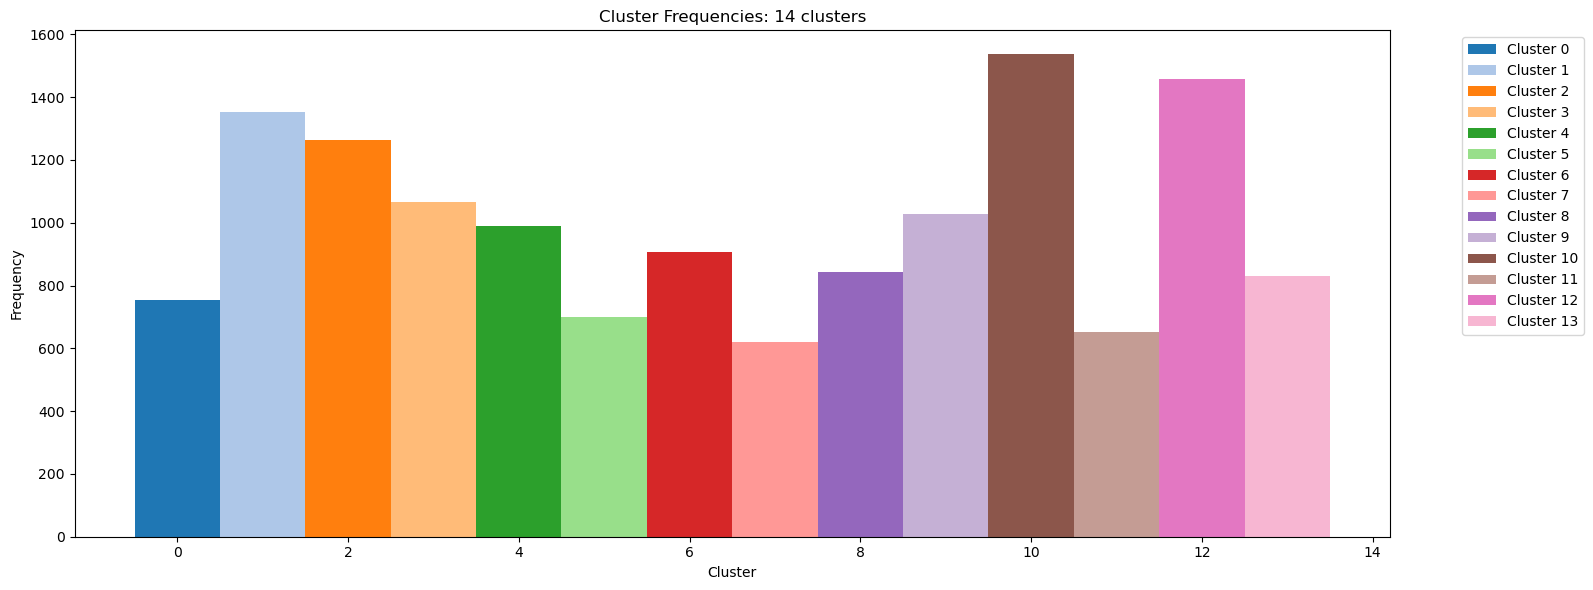

In [13]:
plot_cluster_frequencies(data=data, model_name=mg_evaluation.model_name, best_model_info=best)

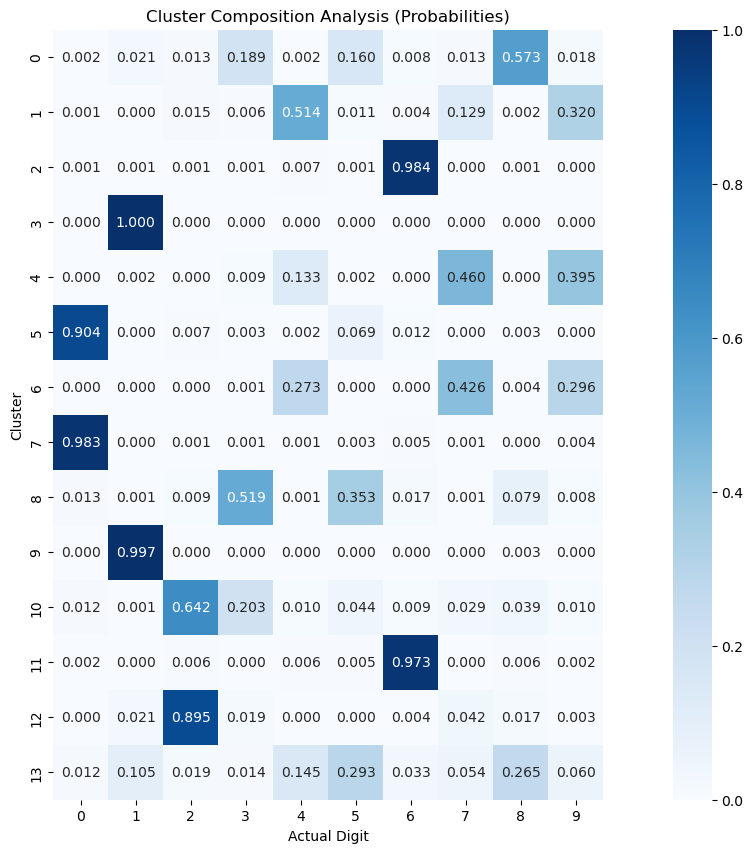

Percentage of clusters focused on each digit:
For digit 0: 14.286%
For digit 1: 14.286%
For digit 2: 14.286%
For digit 3: 7.143%
For digit 4: 7.143%
For digit 5: 0.000%
For digit 6: 14.286%
For digit 7: 0.000%
For digit 8: 7.143%
For digit 9: 0.000%
Clusters underperforming (distributed across multiple digits): 21.429%


In [6]:
plot_cluster_composition(data=data, model_name=mg_evaluation.model_name, best_model_info=best)

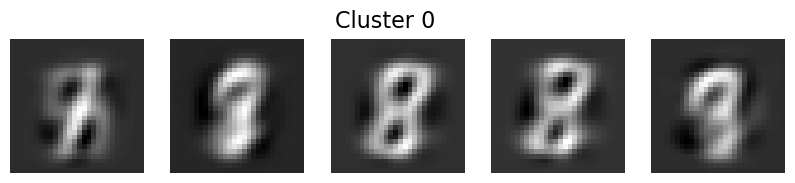

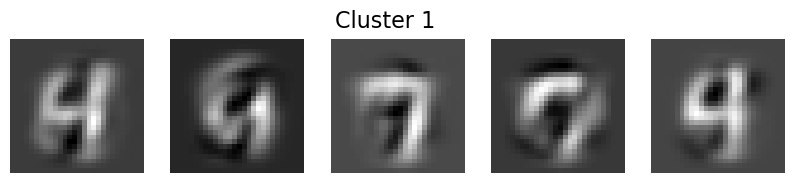

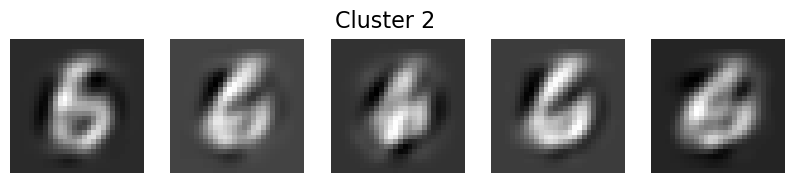

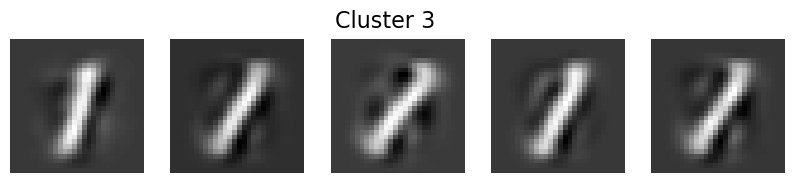

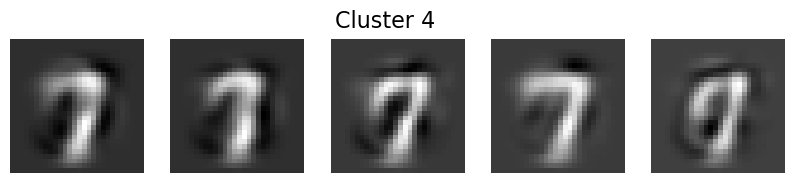

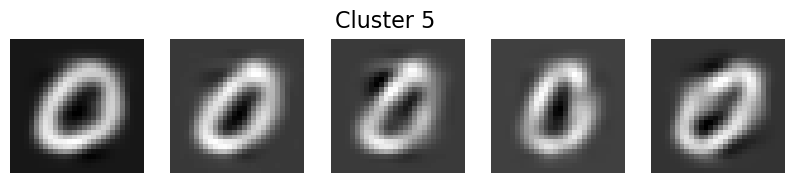

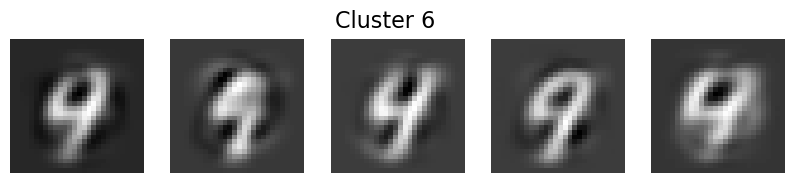

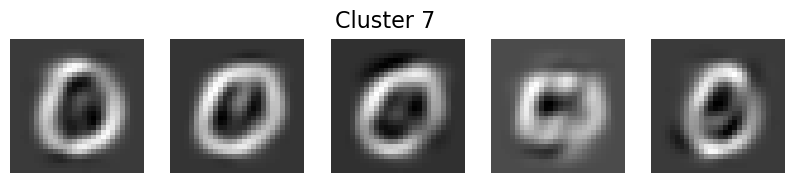

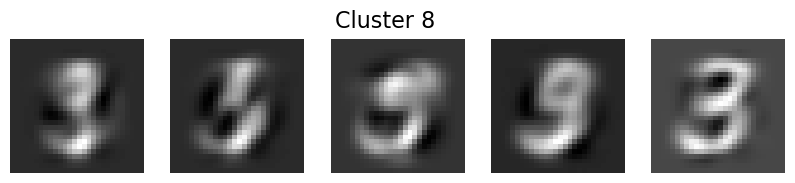

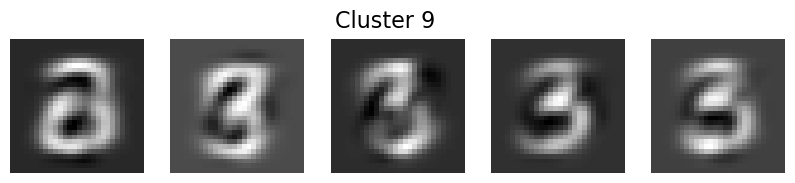

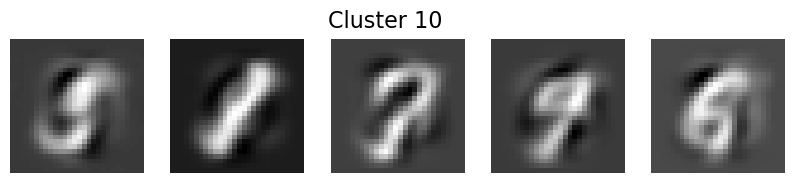

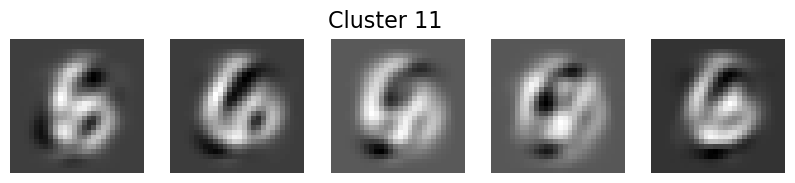

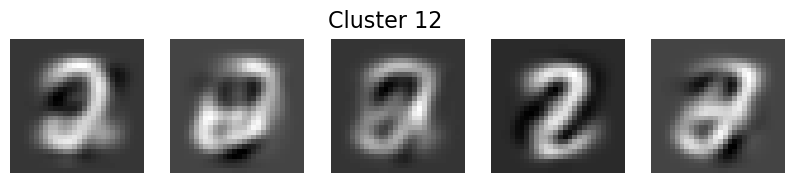

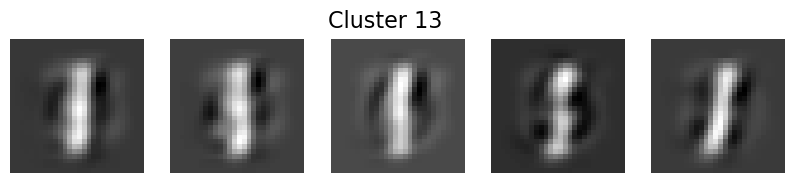

In [6]:
plot_reconstructed_images(data=data, model_name=mg_evaluation.model_name, best_model_info=best)

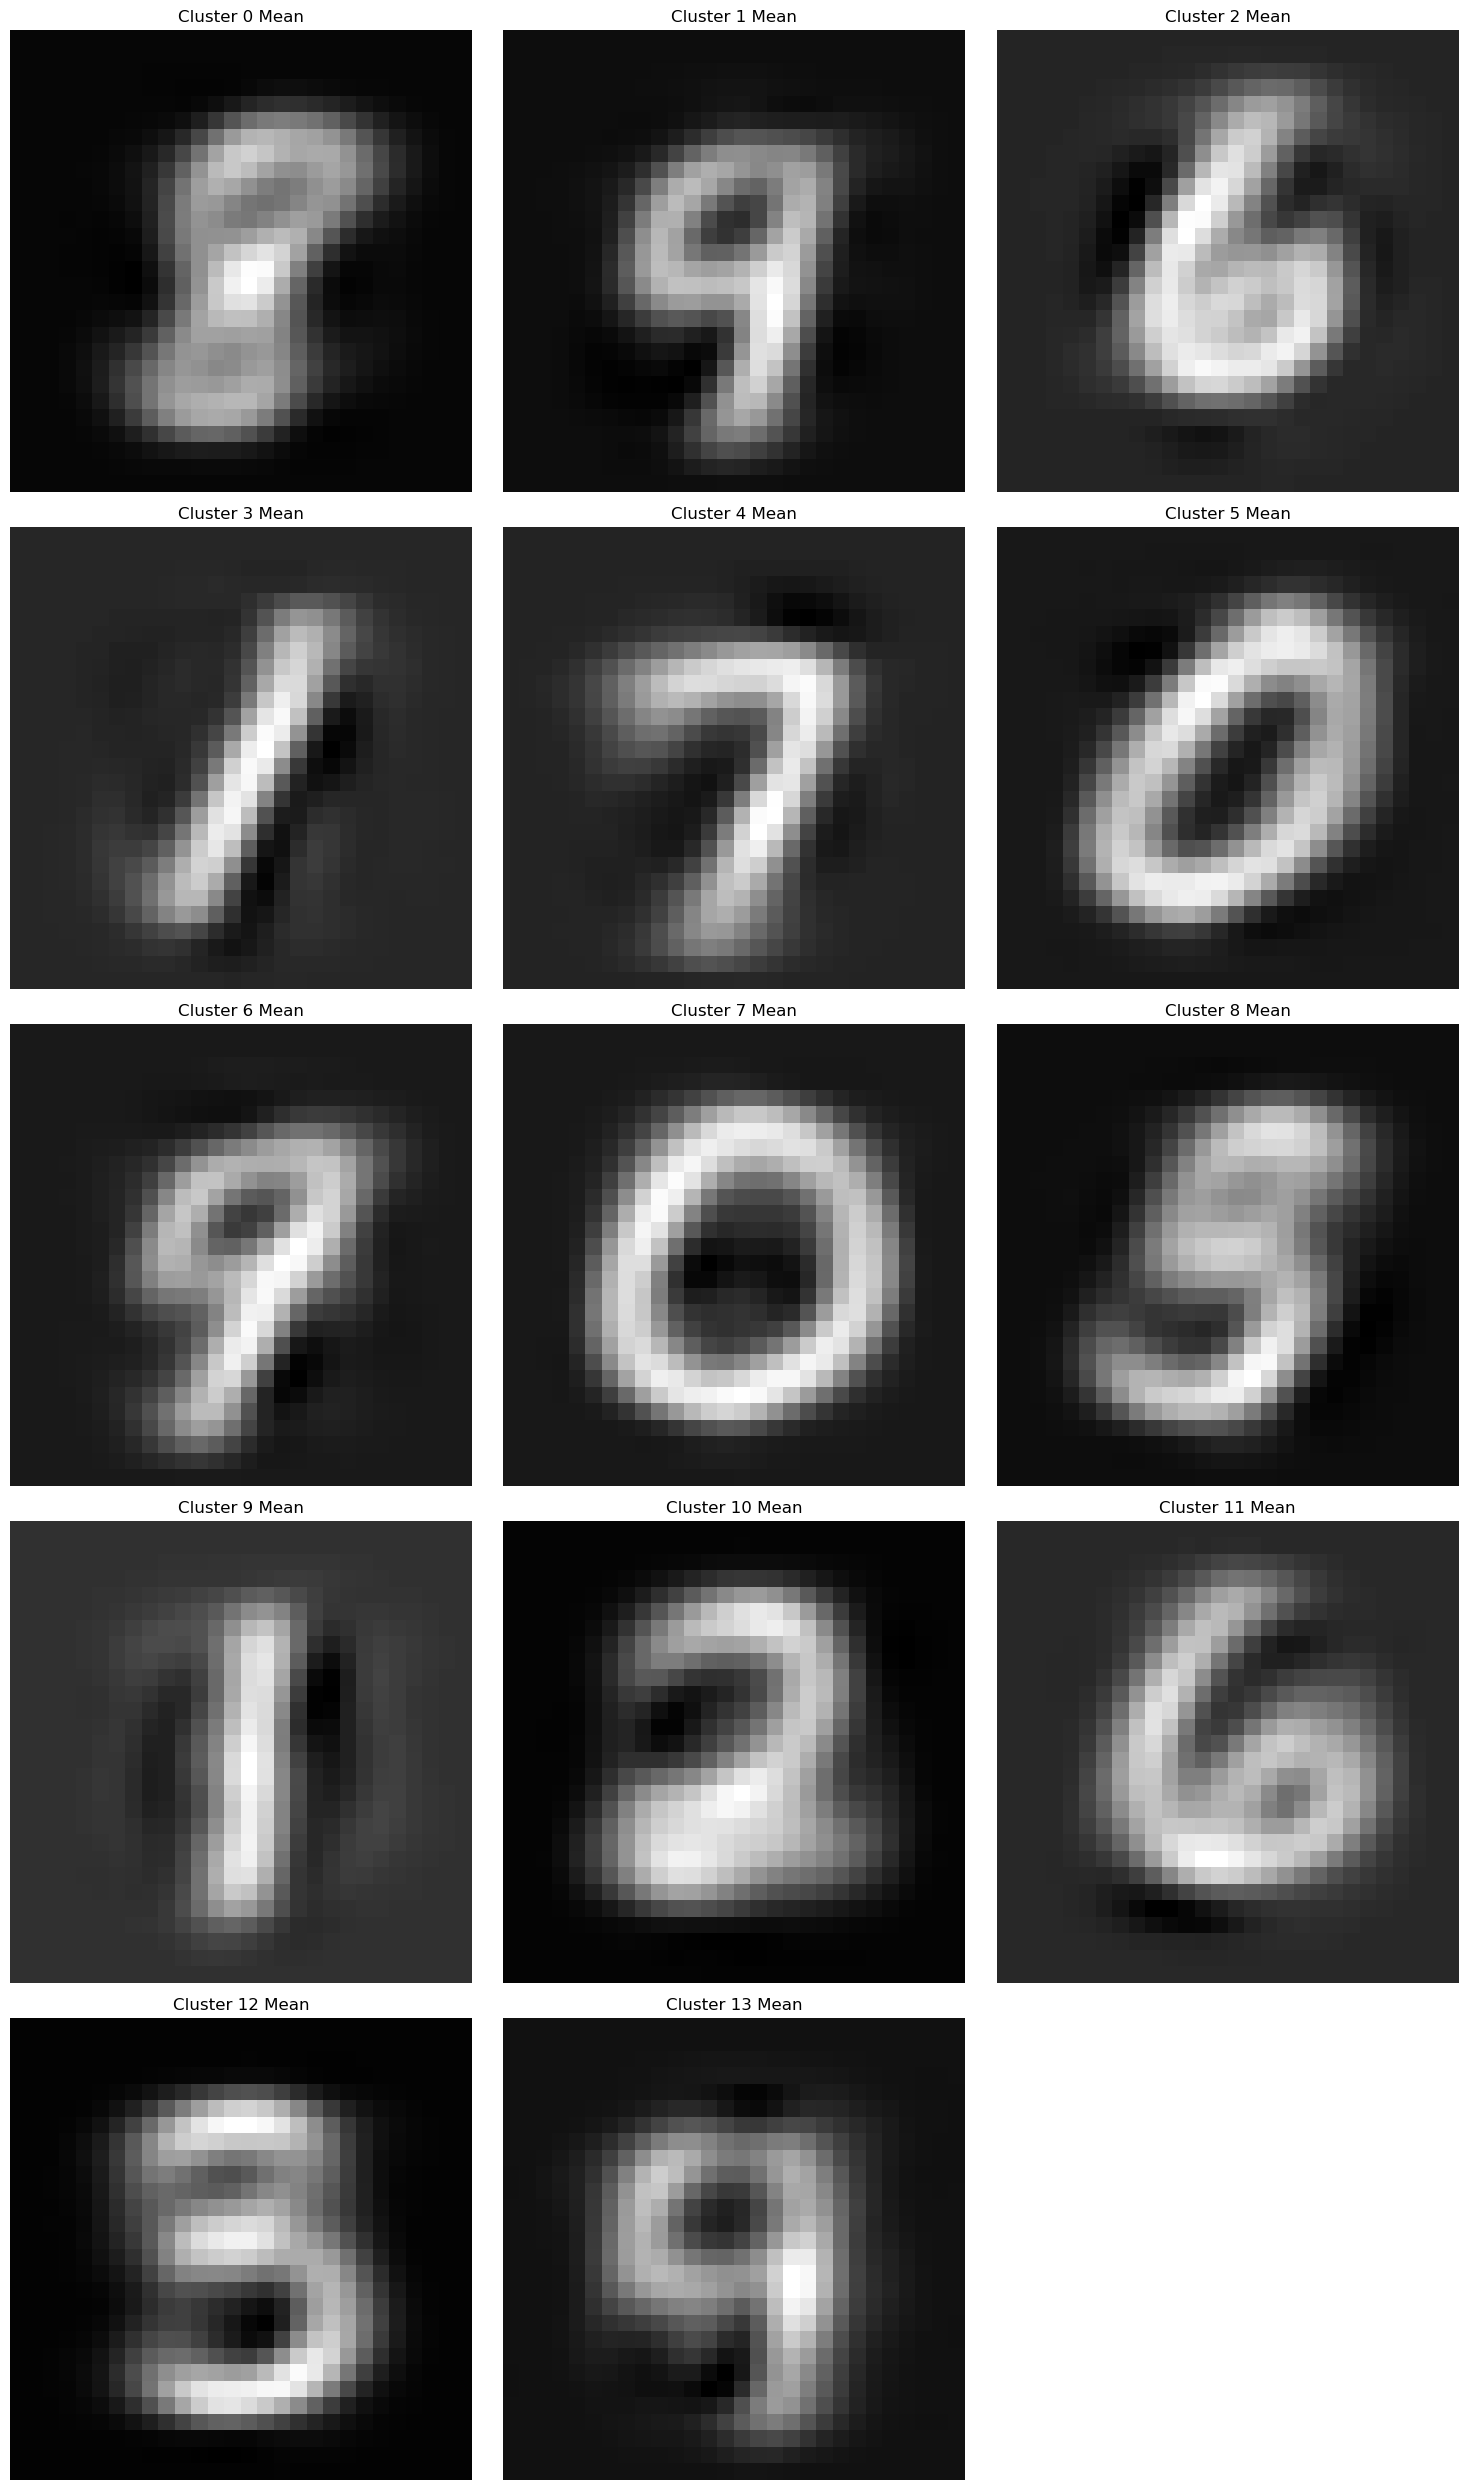

In [7]:
visualize_model_means(data=data, model_name=mg_evaluation.model_name, best_model_info=best)